# Basic example of an auralization

In this notebook we create a basic auralization. We consider an omni-directional source emitting a sine and a receiver. No propagation effects are included.

In [1]:
from auraliser import Auraliser
from auraliser.sinks import mono
import numpy as np
from auraliser.generator import Sine, Noise, NoiseBands
from acoustics.directivity import Cardioid, FigureEight, Omni
from acoustics.signal import OctaveBand
from geometry import Point
from ism import Wall
from IPython.display import Audio
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
%matplotlib inline
from acoustics.reflection import Boundary
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

We start with some basic settings.

In [2]:
fs = 22050.0        # Sample frequency
duration = 12.      # Duration in seconds.
df = 50.0           # Frequency resolution (impedances reflections)
dt = 1.0/fs
t = np.arange(0.0, duration, dt)        # Time vector

We create an instance of `Auraliser`.

In [3]:
model = Auraliser(duration=duration, sample_frequency=fs)

In this step we define a moving source. The source is radiating a sine wave at 500 Hz.

In [4]:
velocity = 60.0                         # Velocity of source in meters per second.

distance = velocity * duration          # Total distance covered

x = np.ones_like(t) * velocity * (t - duration/2.0)    # Source moves along the x-axis.
y = np.ones_like(t) * 1.0
z = np.ones_like(t) * 100.0   # Altitude of source

src = model.add_source(name='source0', position=np.vstack((x,y,z)).T)

subsrc = src.add_subsource('subsource0')#, position=Point(0.0, 0.0, 0.0))
sine0 = subsrc.add_virtualsource('sine0', signal=Sine(1000.0), directivity=Omni())

Next, we define a receiver.

In [5]:
rcv = model.add_receiver(name='receiver', position=Point(0.0,0.0,1.6))

In this example we turn the following propagation effects off.

In [6]:
model.settings['spreading']['include'] = False
model.settings['doppler']['include'] = False
model.settings['atmospheric_absorption']['include'] = False
model.settings['reflections']['include'] = False
model.settings['turbulence']['include'] = False

Now the model is complete we can generate an auralization

In [7]:
channels = rcv.auralise()

and listen to it.

In [8]:
signal = mono(channels)
Audio(data=signal, rate=signal.fs)

Since the output is an instance of `Signal` we can right away generate some useful figures, like the spectrogram.

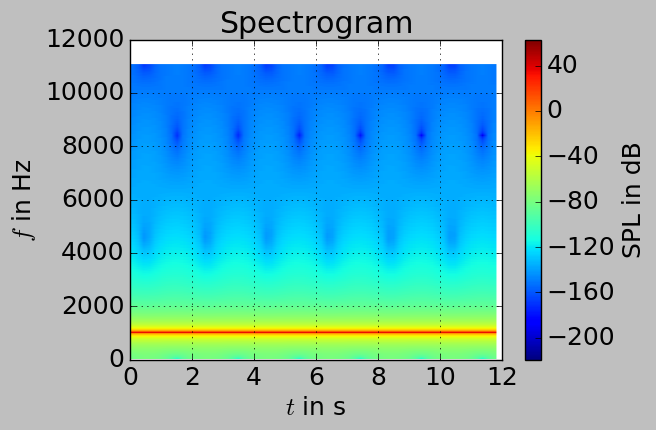

In [9]:
fig = signal.spectrogram()

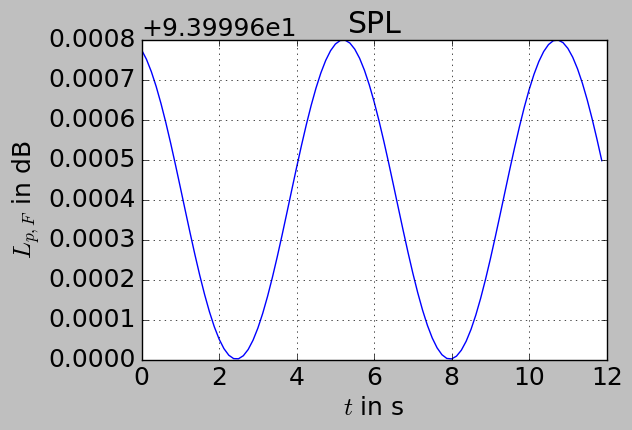

In [10]:
fig = signal.plot_levels()